In [149]:
from math import sin, pi
import matplotlib.pyplot as plt
import numpy
import pandas
import datetime
from dateutil.relativedelta import relativedelta

# sin generation parameters 
x0 = 0.0
step = 2*pi/52
nsteps = 52*20

data = []
x = x0

scale = 2*pi/12.0

for i in range(0,nsteps):
    y = 5*sin(x) + x 
    x = x + step
    data.append(y)
    
# Generate dates 
start = datetime.datetime.strptime("1990-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(weeks=x) for x in range(0,52*20)]

# Convert to pandas DataFrame format
data = pandas.DataFrame(data)
data.columns = ['sinwave']
data['index'] = date_list
data.set_index(['index'], inplace=True)


print('Pandas DataFrame format ...')
print(data.head())

Pandas DataFrame format ...
             sinwave
index               
1990-01-01  0.000000
1990-01-08  0.723514
1990-01-15  1.438239
1990-01-22  2.135516
1990-01-29  2.806938


1040


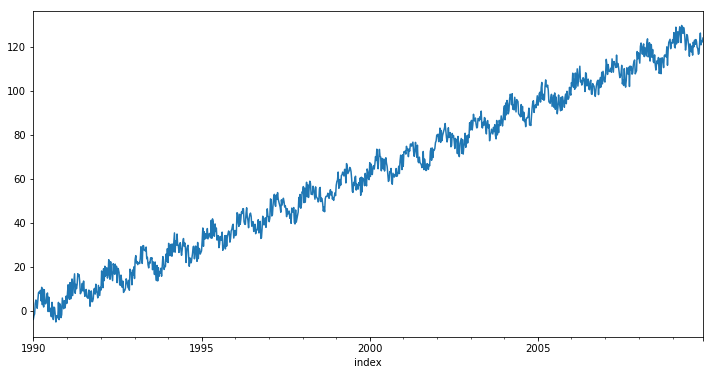

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

n = len(data.sinwave.values)
print(n)

dev = numpy.random.randint(low=-5, high=5, size=n)

for i in range(n):
    data['sinwave'][i] = data['sinwave'][i]  + dev[i]

data.sinwave.plot()
plt.show()

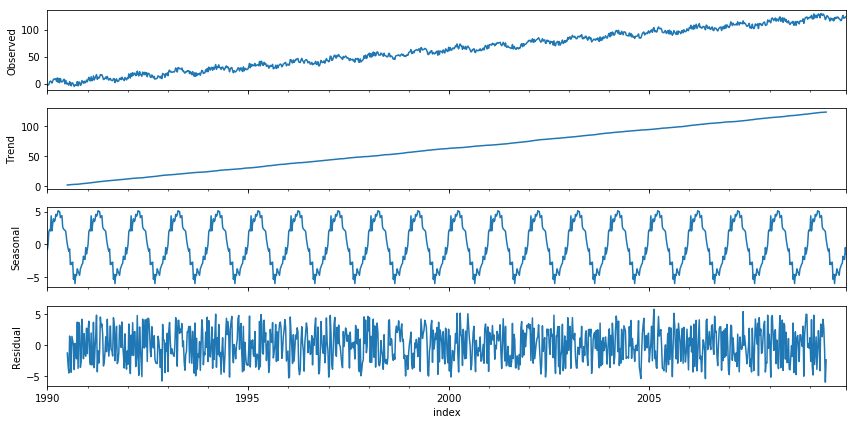

In [151]:
decomposition = seasonal_decompose(data.sinwave, freq=52)
plt.rcParams["figure.figsize"] = [12,6]
decomposition.plot() 

In [166]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data.sinwave, trend='t', order=(0,1,0), seasonal_order=(1,1,1,52))
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            sinwave   No. Observations:                 1040
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 52)   Log Likelihood               -2854.099
Date:                            Tue, 19 Sep 2017   AIC                           5716.199
Time:                                    16:04:52   BIC                           5735.987
Sample:                                01-01-1990   HQIC                          5723.705
                                     - 11-30-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -3.995e-06   6.84e-05     -0.058      0.953      -0.000       0.000
ar.S.L52       0.1072      0.058   

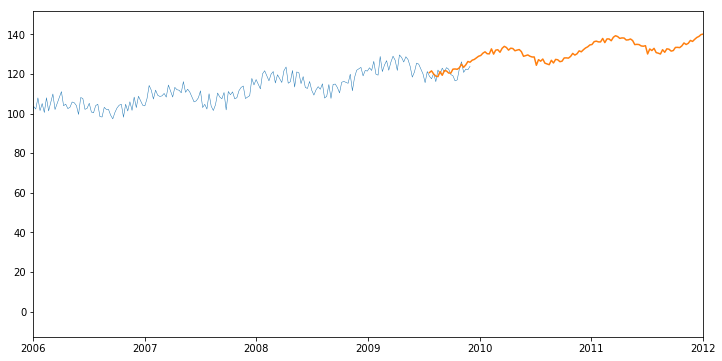

In [167]:
start = data.index[-20]
end = start + relativedelta(weeks=52*3)

forecast = results.predict(start = start, end=end, dynamic= True)

plt.plot(data['sinwave'],linewidth=0.5)
plt.plot(forecast)
plt.xlim('2006','2012')
plt.show()